In [54]:
import tensorflow as tf
import keras
import keras_vggface
from keras_vggface.vggface import VGGFace
# Had to change code in keras vggface to make it work changed model.py line 20 as shown here https://stackoverflow.com/a/71379206
import numpy as np
import matplotlib as mpl
import keras_vggface.utils
import PIL
import os
import os.path
import matplotlib.pyplot as plt

In [55]:
train_seed = 30
split = 0.2

train_dataset = keras.utils.image_dataset_from_directory('./Faces', shuffle=True, image_size=(224, 224), batch_size=64, seed=train_seed, validation_split=split, subset='training')
val_dataset = keras.utils.image_dataset_from_directory('./Faces', shuffle=True, image_size=(224, 224), batch_size=64, seed=train_seed, validation_split=split, subset='validation')

Found 300 files belonging to 4 classes.
Using 240 files for training.
Found 300 files belonging to 4 classes.
Using 60 files for validation.


In [56]:
data_aug = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2), ])

In [57]:
num_classes = 4

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

TypeError: Rescaling.__init__() missing 1 required positional argument: 'scale'

In [ ]:
LR = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [50]:
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20


2023-05-04 10:02:49.115647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 5.8074 - accuracy: 0.3458

2023-05-04 10:02:50.757410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 505ms/step - loss: 5.8074 - accuracy: 0.3458 - val_loss: 2.9269 - val_accuracy: 0.6500
Epoch 2/20
4/4 [==============================] - 2s 461ms/step - loss: 2.3954 - accuracy: 0.5458 - val_loss: 0.9853 - val_accuracy: 0.8833
Epoch 3/20
4/4 [==============================] - 2s 455ms/step - loss: 0.6296 - accuracy: 0.7833 - val_loss: 0.4900 - val_accuracy: 0.7000
Epoch 4/20
4/4 [==============================] - 2s 459ms/step - loss: 0.4745 - accuracy: 0.7583 - val_loss: 0.5373 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 2s 458ms/step - loss: 0.3869 - accuracy: 0.7917 - val_loss: 0.3843 - val_accuracy: 0.8000
Epoch 6/20
4/4 [==============================] - 2s 457ms/step - loss: 0.3493 - accuracy: 0.8750 - val_loss: 0.3661 - val_accuracy: 0.8833
Epoch 7/20
4/4 [==============================] - 2s 456ms/step - loss: 0.2940 - accuracy: 0.9250 - val_loss: 0.3372 - val_accuracy: 0.8500
Epoch 8/20
4/4 [===============

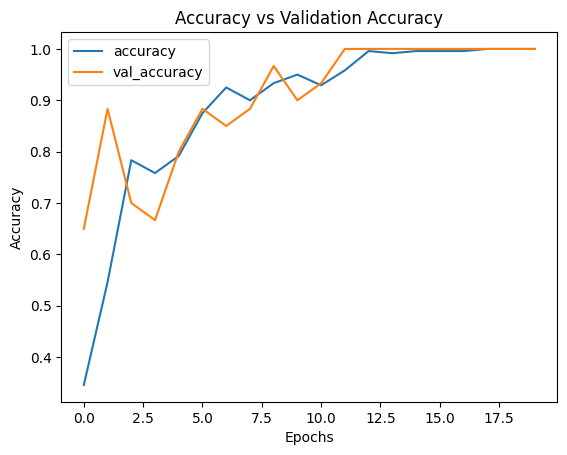

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
class_labels = ['Elmo', 'Heidi', 'Jacob', 'Unknown']

In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    # Load and resize the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert the image to a numpy array and normalize the pixel values
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    return img_array

# Replace 'path/to/your/image.jpg' with the actual path to the image you want to predict on
# img_path = 'Faces/Jacob/0f2f_Jacob_4.jpg'
img_path = 'Faces/Heidi/Heidi16.jpg'
# img_path = 'Elmo1.jpg'

img_array = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions (if necessary, e.g., for classification tasks)
# decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the results
print(predictions)
# Convert the predicted probabilities to class indices
predicted_class_index = np.argmax(predictions)

# Map the predicted class index to the corresponding class label
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)


1/1 [==============================] - 0s 54ms/step
[[ 5.3173885  6.0894823 -4.438844  21.125366 ]]
Unknown


2023-05-04 10:04:35.358399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# Privacy

In [21]:
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer
import tensorflow_privacy

In [22]:
num_classes = 4

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [23]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction=tf.losses.Reduction.NONE)

In [24]:
noise_multiplier = 1.1
l2_norm_clip = 5
num_microbatches = 16
learning_rate = 0.0001

optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate
)

In [26]:
LR = 0.0001

model.compile(optimizer=optimizer,
    loss = loss,
    metrics=['accuracy'])

In [27]:
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20


2023-05-03 21:16:14.747750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 7.9973 - accuracy: 0.2750

2023-05-03 21:16:39.179112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 26s 3s/step - loss: 7.9973 - accuracy: 0.2750 - val_loss: 8.7218 - val_accuracy: 0.2333
Epoch 2/20
8/8 [==============================] - 23s 3s/step - loss: 6.3346 - accuracy: 0.2583 - val_loss: 6.3169 - val_accuracy: 0.2333
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 3.7928 - accuracy: 0.2375 - val_loss: 3.3981 - val_accuracy: 0.2500
Epoch 4/20
8/8 [==============================] - 23s 3s/step - loss: 2.6228 - accuracy: 0.2458 - val_loss: 2.8559 - val_accuracy: 0.2500
Epoch 5/20
8/8 [==============================] - 24s 3s/step - loss: 2.3668 - accuracy: 0.2417 - val_loss: 2.4483 - val_accuracy: 0.2333
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 2.2226 - accuracy: 0.2292 - val_loss: 2.1481 - val_accuracy: 0.2500
Epoch 7/20
8/8 [==============================] - 24s 3s/step - loss: 1.8648 - accuracy: 0.2375 - val_loss: 2.0223 - val_accuracy: 0.2500
Epoch 8/20
8/8 [=============================